In [1]:
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_distances
import joblib
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
with open('./flask_app/250k_new_df_pickle_4.pkl', 'rb') as f:
    df = pickle.load(f)

In [3]:
df.head()

,Unnamed: 0,title,NER,site,urls,bag_of_words,cleaned_bow
566922,566922,Condensed Tomato Soup,"[tomatoes, chicken broth, heavy cream]",www.cookbooks.com,http://www.cookbooks.com/Recipe-Details.aspx?i...,Condensed Tomato Soup 1 large can of crushed t...,condens tomato soup 1 larg crush tomato 4 chic...
240073,240073,Vegetable Clam Chowder(Low-Fat),"[clams, bay leaves, oregano, onion, low-fat ch...",www.cookbooks.com,http://www.cookbooks.com/Recipe-Details.aspx?i...,Vegetable Clam Chowder(Low-Fat) 2 cans clams...,veget clam chowder low-fat 2 can clam 2 bay le...
599686,599686,Party Potatoes,"[white potatoes, salt, sour cream, Cheddar che...",www.cookbooks.com,http://www.cookbooks.com/Recipe-Details.aspx?i...,"Party Potatoes 4 to 5 large white potatoes, bo...",parti potato 4 5 larg white potato boil jacket...
122349,122349,Dirty Rice,"[ground chuck, rice, onion soup, cream of chic...",www.cookbooks.com,http://www.cookbooks.com/Recipe-Details.aspx?i...,Dirty Rice 1 lb. ground chuck 1 c. uncooked ri...,dirti rice 1 ground chuck 1 uncook rice 1 onio...
782954,782954,"""Herman"" Starter","[flour, sugar, yeast, salt, warm water]",www.cookbooks.com,http://www.cookbooks.com/Recipe-Details.aspx?i...,"""Herman"" Starter 2 c. flour 3 Tbsp. sugar 1 en...",`` herman '' starter 2 flour 3 sugar 1 envelop...


In [4]:
df['site'].unique()

array(['www.cookbooks.com', 'www.myrecipes.com', 'www.food.com',
       'www.allrecipes.com', 'www.epicurious.com', 'www.tasteofhome.com',
       'www.yummly.com', 'tastykitchen.com', 'recipes-plus.com',
       'food52.com', 'www.seriouseats.com'], dtype=object)

In [5]:
def get_counts(df, column):
    column_df = pd.DataFrame(df[column])
    column_counts = column_df[column].explode().value_counts()
    column_counts_df = column_counts.to_frame('counts').reset_index()
    column_counts_df = column_counts_df.rename(columns = {'index': column})
    
    return column_counts_df

In [6]:
website_counts = get_counts(df, 'site')
website_counts

,site,counts
0,www.cookbooks.com,136380
1,www.food.com,44210
2,www.epicurious.com,14363
3,www.myrecipes.com,9869
4,www.allrecipes.com,9342
5,www.yummly.com,7906
6,www.tasteofhome.com,7850
7,tastykitchen.com,7656
8,food52.com,7379
9,recipes-plus.com,3123


In [7]:
def counts_horizontal_bar(df, x_column, y_column, x_min, x_max, x_inc, ax):
    x_data = df[x_column]
    y_data = df[y_column]
    y = np.arange(len(y_data))
    x = np.linspace(x_min, x_max, (x_max-x_min)//x_inc + 1, dtype='int')
    
    ax.barh(y_data, x_data)
    ax.invert_yaxis()
    ax.set_yticks(y)
    ax.set_xticks(x)
    ax.set_xticklabels(x, fontsize = 18, rotation = 45)
    ax.set_yticklabels(y_data, fontsize = 18)
    ax.xaxis.grid(True)
    fig.tight_layout()

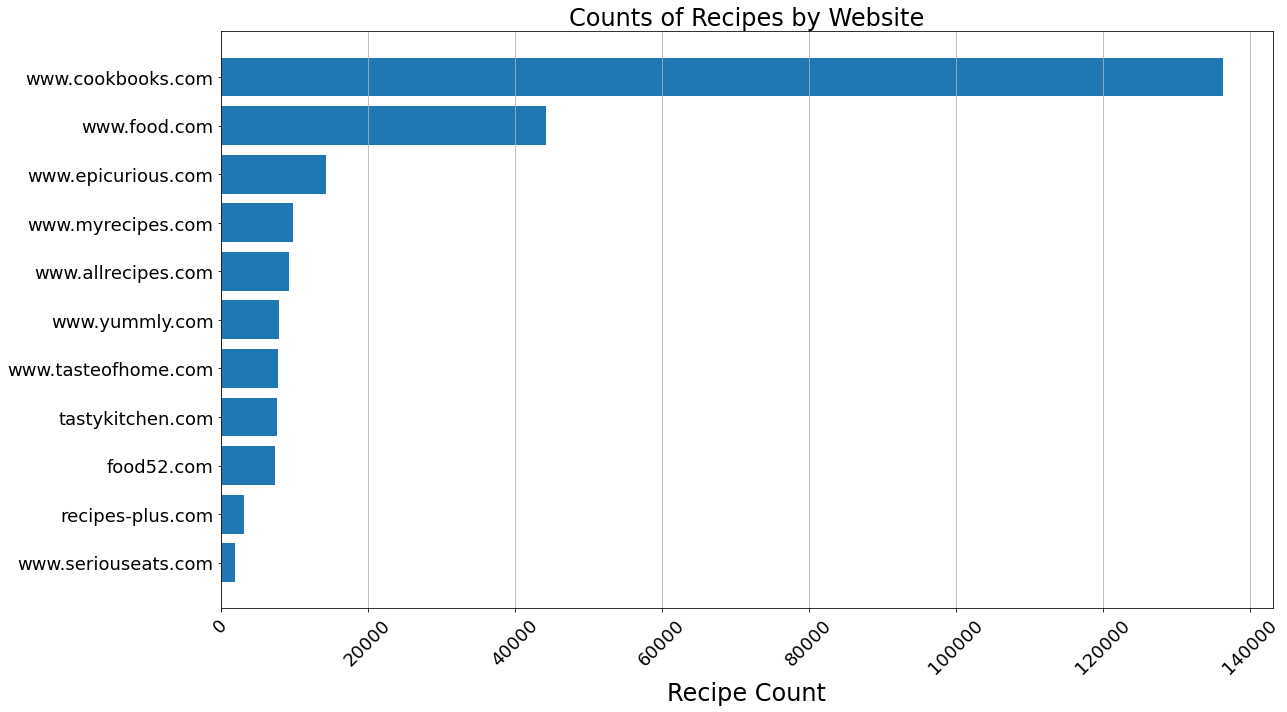

In [8]:
fig, ax = plt.subplots(figsize=(18,10))
ax.set_xlabel('Recipe Count', fontsize = 24)
ax.set_title('Counts of Recipes by Website', fontsize = 24)

counts_horizontal_bar(website_counts, 'counts', 'site', 0, 140000, 20000, ax)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250000 entries, 566922 to 445003
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    250000 non-null  int64 
 1   title         250000 non-null  object
 2   NER           250000 non-null  object
 3   site          250000 non-null  object
 4   urls          250000 non-null  object
 5   bag_of_words  250000 non-null  object
 6   cleaned_bow   250000 non-null  object
dtypes: int64(1), object(6)
memory usage: 15.3+ MB


In [11]:
df_subset_train, df_subset_test = train_test_split(df, stratify=df['site'], test_size=0.25)

In [12]:
docs_train = df_subset_train['cleaned_bow']
docs_test = df_subset_test['cleaned_bow']
docs_full = df['cleaned_bow']

In [13]:
lda_model_1 = joblib.load('./models/lda_model.joblib')
lda_model_2 = joblib.load('./models/lda_model_1_tid.joblib')
lda_model_3 = joblib.load('./models/lda_model_2_tdn.joblib')
lda_model_4 = joblib.load('./models/lda_model_2_tid.joblib')
lda_model_5 = joblib.load('./models/lda_model_3_tid.joblib')
lda_model_6 = joblib.load('./models/lda_model_4_tid.joblib')
lda_model_7 = joblib.load('./models/lda_model_5_tid.joblib')
lda_model_8 = joblib.load('./models/lda_model_6_tid_pickle4.joblib')
lda_model_9 = joblib.load('./models/lda_model_full_tid_pickle4.joblib')

In [14]:
models = [lda_model_1, lda_model_2, lda_model_3, lda_model_4, lda_model_5, lda_model_6, lda_model_7, lda_model_8, lda_model_9]

In [15]:
i = 0
for model in models:
    i += 1
    print(f'Model: {i}\n\nParameters:{model.get_params()}\n')

Model: 1

Parameters:{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'online', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 30, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': None, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}

Model: 2

Parameters:{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'online', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 30, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': None, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}

Model: 3

Parameters:{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'online', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_componen

models 1 - 4 are the same: n_components =30, everything else default

model 5 changed n_components to 100, everything else default

model 6 changed batch size to 32, learning offset 20, everything else the same

model 7 doc_topic_prior 0.9 topic_word_prior 0.9, everything else the same

model 8 learning offset to 50

In [16]:
unique_models = [lda_model_1, lda_model_5, lda_model_6, lda_model_7, lda_model_8]

In [17]:
vec_1 = joblib.load('./models/vec.joblib')
vec_2 = joblib.load('./models/vec_1_tid.joblib')
vec_3 = joblib.load('./models/vec_2_tdn.joblib')
vec_4 = joblib.load('./models/vec_2_tid.joblib')
vec_5 = joblib.load('./models/vec_3_tid.joblib')
vec_6 = joblib.load('./models/vec_4_tid.joblib')
vec_7 = joblib.load('./models/vec_5_tid.joblib')
vec_8 = joblib.load('./models/vec_6_tid.joblib')
vec_9 = joblib.load('./models/vec_6_tid_pickle4.joblib')

In [18]:
vecs = [vec_1, vec_2, vec_3, vec_4, vec_5, vec_6, vec_7, vec_8, vec_9]

In [19]:
i = 0
for vec in vecs:
    i += 1
    print(f'Vectorizer: {i}\n\nParameters:{vec.get_params()}\n')

Vectorizer: 1

Parameters:{'analyzer': 'word', 'binary': False, 'decode_error': 'strict', 'dtype': <class 'numpy.int64'>, 'encoding': 'utf-8', 'input': 'content', 'lowercase': True, 'max_df': 0.85, 'max_features': 1000, 'min_df': 2, 'ngram_range': (1, 2), 'preprocessor': None, 'stop_words': None, 'strip_accents': None, 'token_pattern': '(?u)\\b\\w\\w+\\b', 'tokenizer': None, 'vocabulary': None}

Vectorizer: 2

Parameters:{'analyzer': 'word', 'binary': False, 'decode_error': 'strict', 'dtype': <class 'numpy.int64'>, 'encoding': 'utf-8', 'input': 'content', 'lowercase': True, 'max_df': 0.85, 'max_features': 1000, 'min_df': 2, 'ngram_range': (1, 2), 'preprocessor': None, 'stop_words': None, 'strip_accents': None, 'token_pattern': '(?u)\\b\\w\\w+\\b', 'tokenizer': None, 'vocabulary': None}

Vectorizer: 3

Parameters:{'analyzer': 'word', 'binary': False, 'decode_error': 'strict', 'dtype': <class 'numpy.int64'>, 'encoding': 'utf-8', 'input': 'content', 'lowercase': True, 'max_df': 0.85, 'max

Vectorizer 1 and 2: max_df=0.85, min_df=2, max_features=1000, n_gram_range=(1,2)

Vectorizer 3, 4, 5, 6: n_gram_range=(1,3)

Vectorizer 7, 8, 9: max_features = 500, n_gram_range = (1,2)

In [20]:
vec_10 = CountVectorizer(max_df=0.85, 
                      min_df=10,
                      ngram_range=(1,3),
                      max_features=1000)

Vectorizer 10: min_df=10, ngram_range=(1,3), max_features=1000

In [21]:
vec_11 = CountVectorizer(max_df=0.85, 
                      min_df=10,
                      ngram_range=(1,3),
                      max_features=500)

In [22]:
vecs.append(vec_10)
vecs.append(vec_11)

In [23]:
unique_vecs = [vecs[0], vecs[2], vecs[6], vecs[9], vecs[10]]
unique_vecs

[CountVectorizer(max_df=0.85, max_features=1000, min_df=2, ngram_range=(1, 2)),
 CountVectorizer(max_df=0.85, max_features=1000, min_df=2, ngram_range=(1, 3)),
 CountVectorizer(max_df=0.85, max_features=500, min_df=2, ngram_range=(1, 2)),
 CountVectorizer(max_df=0.85, max_features=1000, min_df=10, ngram_range=(1, 3)),
 CountVectorizer(max_df=0.85, max_features=500, min_df=10, ngram_range=(1, 3))]

In [24]:
vec_1, vec_2, vec_3, vec_4, vec_5 = unique_vecs

In [25]:
tf_vec1 = vec_1.fit_transform(docs_train)
tf_vec2 = vec_2.fit_transform(docs_train)
tf_vec3 = vec_3.fit_transform(docs_train)
tf_vec4 = vec_4.fit_transform(docs_train)
tf_vec5 = vec_5.fit_transform(docs_train)

In [26]:
tf_vec1_test = vec_1.fit_transform(docs_test)
tf_vec2_test = vec_2.fit_transform(docs_test)
tf_vec3_test = vec_3.fit_transform(docs_test)
tf_vec4_test = vec_4.fit_transform(docs_test)
tf_vec5_test = vec_5.fit_transform(docs_test)

In [64]:
tf_full_3 = vec_3.fit_transform(docs_full)
tf_full_4 = vec_4.fit_transform(docs_full)
tf_full_5 = vec_5.fit_transform(docs_full)

## 30 components, different vectors

In [27]:
scores = []
perplexity = []

In [28]:
lda_model_1.fit(tf_vec1)
lda_1_1_score = lda_model_1.score(tf_vec1_test)
lda_1_1_perplexity = lda_model_1.perplexity(tf_vec1_test)
scores.append(lda_1_1_score)
perplexity.append(lda_1_1_perplexity)

In [29]:
lda_model_1.fit(tf_vec2)
lda_1_2_score = lda_model_1.score(tf_vec2_test)
lda_1_2_perplexity = lda_model_1.perplexity(tf_vec2_test)
scores.append(lda_1_2_score)
perplexity.append(lda_1_2_perplexity)

In [30]:
lda_model_1.fit(tf_vec3)
lda_1_3_score = lda_model_1.score(tf_vec3_test)
lda_1_3_perplexity = lda_model_1.perplexity(tf_vec3_test)
scores.append(lda_1_3_score)
perplexity.append(lda_1_3_perplexity)

In [31]:
probs_1_3 = lda_model_1.transform(tf_full_3)

In [32]:
lda_model_1.fit(tf_vec4)
lda_1_4_score = lda_model_1.score(tf_vec4_test)
lda_1_4_perplexity = lda_model_1.perplexity(tf_vec4_test)
scores.append(lda_1_4_score)
perplexity.append(lda_1_4_perplexity)

In [33]:
probs_1_4 = lda_model_1.transform(tf_full_4)

In [34]:
lda_model_1.fit(tf_vec5)
lda_1_5_score = lda_model_1.score(tf_vec5_test)
lda_1_5_perplexity = lda_model_1.perplexity(tf_vec5_test)
scores.append(lda_1_5_score)
perplexity.append(lda_1_5_perplexity)

In [35]:
probs_1_5 = lda_model_1.transform(tf_full_5)

In [36]:
scores

[-11719437.055167522,
 -11732851.78508237,
 -9155206.162445333,
 -11762222.658326842,
 -9157895.911005896]

In [37]:
perplexity

[374.0823695634788,
 365.2129162997278,
 239.35102615072194,
 370.64739818326944,
 238.0173623434201]

In [38]:
def closest_recipes(keyword, idx_arr, recipes, probs, n_docs=10):
    recipe_idx = recipes[recipes.str.contains(keyword, case=False, regex=False)].index[0]
    keyword_idx = int(np.where(idx_arr == recipe_idx)[0])
    sims = cosine_distances(probs[keyword_idx].reshape(1, -1), probs).argsort()[0]
    print(f'Top {n_docs} recipes most closely related to {keyword} (reference recipe: {recipes.loc[recipes.index[keyword_idx]]})')
    return np.array(recipes)[sims[1:n_docs+1]]

In [93]:
recipes = df['title']

In [94]:
idx_arr = np.array(recipes.index)

In [95]:
recipe_recs_1_3 = closest_recipes('soup', idx_arr, recipes, probs_1_3)
recipe_recs_1_3

Top 10 recipes most closely related to soup (reference recipe: Fresh Tomato Soup)


array(['Rinkum Ditty', 'Seafood Pasta', '"Primavera Salad"(Spring)  ',
       'Wacky Mac Pasta Salad', 'Tangy (Not Sweet) Tartar Sauce',
       'Fire-Roasted Tomato Minestrone', 'Picadillo', 'Macaroni Salad',
       'Italian Tomato Salad', 'Italian Cheese Omelet'], dtype=object)

In [96]:
recipe_recs_1_4 = closest_recipes('soup', idx_arr, recipes, probs_1_4)
recipe_recs_1_4

Top 10 recipes most closely related to soup (reference recipe: Fresh Tomato Soup)


array(['Vegetable Bean Soup', 'Quick Minestrone Beef Soup',
       'Mexican Corn Chowder',
       "Marilyn'S Peppers Stuffed With Tofu & Rice",
       'Italian Beef And Rice Skillet',
       'Green Chile-White Bean Chicken Stew', 'Sams Run-Out Shrimp ',
       'Creole Vegetable-And-Braised Beef Stew', 'Quinoa With Mushrooms',
       'Quick Vegetable Soup'], dtype=object)

In [97]:
recipe_recs_1_5 = closest_recipes('soup', idx_arr, recipes, probs_1_5)
recipe_recs_1_5

Top 10 recipes most closely related to soup (reference recipe: Fresh Tomato Soup)


array(['Tartar Sauce', 'Broccoli Salad', 'Herb Seasoned Popcorn',
       'Caesar Salad ', 'Vegetable Lasagna', 'Cheese Soup',
       'Rinkum Ditty', 'Cauliflower Salad', 'Shrimp Ring',
       '24 Hour Salad'], dtype=object)

model 1 vector 4 seems best

## 100 components, different vectors

In [44]:
lda_model_5.fit(tf_vec1)
lda_5_1_score = lda_model_5.score(tf_vec1_test)
lda_5_1_perplexity = lda_model_5.perplexity(tf_vec1_test)
scores.append(lda_5_1_score)
perplexity.append(lda_5_1_perplexity)

In [45]:
lda_model_5.fit(tf_vec2)
lda_5_2_score = lda_model_5.score(tf_vec2_test)
lda_5_2_perplexity = lda_model_5.perplexity(tf_vec2_test)
scores.append(lda_5_2_score)
perplexity.append(lda_5_2_perplexity)

In [46]:
lda_model_5.fit(tf_vec3)
lda_5_3_score = lda_model_5.score(tf_vec3_test)
lda_5_3_perplexity = lda_model_5.perplexity(tf_vec3_test)
scores.append(lda_5_3_score)
perplexity.append(lda_5_3_perplexity)

In [47]:
probs_5_3 = lda_model_5.transform(tf_full_3)

In [48]:
lda_model_5.fit(tf_vec4)
lda_5_4_score = lda_model_5.score(tf_vec4_test)
lda_5_4_perplexity = lda_model_5.perplexity(tf_vec4_test)
scores.append(lda_5_4_score)
perplexity.append(lda_5_4_perplexity)

In [49]:
probs_5_4 = lda_model_5.transform(tf_full_4)

In [50]:
lda_model_5.fit(tf_vec5)
lda_5_5_score = lda_model_5.score(tf_vec5_test)
lda_5_5_perplexity = lda_model_5.perplexity(tf_vec5_test)
scores.append(lda_5_5_score)
perplexity.append(lda_5_5_perplexity)

In [51]:
probs_5_5 = lda_model_5.transform(tf_full_5)

In [52]:
scores

[-11719437.055167522,
 -11732851.78508237,
 -9155206.162445333,
 -11762222.658326842,
 -9157895.911005896,
 -11878836.08878937,
 -11907119.449451476,
 -9358480.788125725,
 -11920146.931449585,
 -9334805.62327758]

In [53]:
perplexity

[374.0823695634788,
 365.2129162997278,
 239.35102615072194,
 370.64739818326944,
 238.0173623434201,
 405.4738213036529,
 398.66447974203066,
 270.3070829296621,
 401.28492594884045,
 264.55703193191516]

In [98]:
recipe_recs_5_3 = closest_recipes('vegetarian', idx_arr, recipes, probs_5_3)
recipe_recs_5_3

Top 10 recipes most closely related to vegetarian (reference recipe: Sweet And Spicy Vegetarian Stuffing)


array(['Texas-Style Baked Beans', 'Stuffed Portobello Mushrooms',
       'Grilled Marinated Vegetables', 'Chicken Tamale Casserole',
       'Charred Vegetable Salad', 'Paella With Cauliflower Rice',
       'Baked Chicken  With Cream Cheese Vegetable Topping',
       'Garlic And Bell Pepper Farfalle', 'Sweet Pepper-Onion Relish',
       'Marrakesh Vegetable Curry'], dtype=object)

In [99]:
recipe_recs_5_4 = closest_recipes('vegetarian', idx_arr, recipes, probs_5_4)
recipe_recs_5_4

Top 10 recipes most closely related to vegetarian (reference recipe: Sweet And Spicy Vegetarian Stuffing)


array(['Roasted Carrot And Leek Soup', 'Roasted Tomato Curry Soup',
       'Sweet Pepper-Onion Relish',
       'Roasted Pork Tenderloin With Cajun Cornbread Stuffing',
       'Spicy Stuffed Bell Peppers', 'Oven-Roasted Mediterranean Salmon',
       'Roasted Butternut Squash', 'Cherokee Joe’S Cornbread Soup',
       'Mango Salsa Salmon', 'Baked Mexican Quinoa Casserole'],
      dtype=object)

In [100]:
recipe_recs_5_5 = closest_recipes('vegetarian', idx_arr, recipes, probs_5_5)
recipe_recs_5_5

Top 10 recipes most closely related to vegetarian (reference recipe: Sweet And Spicy Vegetarian Stuffing)


array(['Sweet Pepper-Onion Relish', 'Vegetable Soup',
       'Spanish Lima Beans', 'Soup Nazi Gazpacho', 'Rajasthani Bhindi',
       'Grilled Chicken With A Peach And Green Chili Sauce',
       'Apple Chipotle Salsa (Southwest)', 'Fergese E Tiranes Me Piperka',
       'White Chili', 'Sweet Relishgroves, Texas  '], dtype=object)

difficult to tell if any of these perform better than the others. The scores suggest vector 5 with model 5. Vector 4 seems to capture more of the stuffing

## Batch size 32, learning offset 20

In [57]:
lda_model_6.fit(tf_vec3)
lda_6_3_score = lda_model_6.score(tf_vec3_test)
lda_6_3_perplexity = lda_model_6.perplexity(tf_vec3_test)
scores.append(lda_6_3_score)
perplexity.append(lda_6_3_perplexity)

In [58]:
probs_6_3 = lda_model_6.transform(tf_full_3)

In [59]:
lda_model_6.fit(tf_vec4)
lda_6_4_score = lda_model_6.score(tf_vec4_test)
lda_6_4_perplexity = lda_model_6.perplexity(tf_vec4_test)
scores.append(lda_6_4_score)
perplexity.append(lda_6_4_perplexity)

In [60]:
probs_6_4 = lda_model_6.transform(tf_full_4)

In [61]:
lda_model_6.fit(tf_vec5)
lda_6_5_score = lda_model_6.score(tf_vec5_test)
lda_6_5_perplexity = lda_model_6.perplexity(tf_vec5_test)
scores.append(lda_6_5_score)
perplexity.append(lda_6_5_perplexity)

In [62]:
probs_6_5 = lda_model_6.transform(tf_full_5)

In [63]:
scores

[-11719437.055167522,
 -11732851.78508237,
 -9155206.162445333,
 -11762222.658326842,
 -9157895.911005896,
 -11878836.08878937,
 -11907119.449451476,
 -9358480.788125725,
 -11920146.931449585,
 -9334805.62327758,
 -9468376.261883723,
 -12129779.876655715,
 -9482664.39350789]

In [64]:
perplexity

[374.0823695634788,
 365.2129162997278,
 239.35102615072194,
 370.64739818326944,
 238.0173623434201,
 405.4738213036529,
 398.66447974203066,
 270.3070829296621,
 401.28492594884045,
 264.55703193191516,
 288.6784897032886,
 445.90086258881644,
 288.99533636836776]

In [101]:
recipe_recs_6_3 = closest_recipes('peanut', idx_arr, recipes, probs_6_3)
recipe_recs_6_3

Top 10 recipes most closely related to peanut (reference recipe: Chocolate Peanut Butter Pieces)


array(['Reese Bars', 'Peanut Butter Pom Poms',
       'Chocolate Peanut Butter Smoothie',
       'Microwave Peanut Butter Rocky Road',
       'Five Minute Peanut Butter Fudge', 'Peanut Butter Candy',
       "Mrs. Claus'S Dream Bars", 'Sweet Marie Bars 1963',
       'Easy Peanut Butter Bars', 'Odd Bagel Sandwiches'], dtype=object)

In [102]:
recipe_recs_6_4 = closest_recipes('peanut', idx_arr, recipes, probs_6_4)
recipe_recs_6_4

Top 10 recipes most closely related to peanut (reference recipe: Chocolate Peanut Butter Pieces)


array(['Peanut Blossoms', 'Peanut Butter And Marshmallow Chocolate Eggs',
       'Buckeye Balls', '3 Musketeers Bars', "Mom'S Chocolate Candy",
       'Nanie’S Chocolate Peanut Butter Boiled Cookies',
       'Fannie Mae Fudge',
       'Florentine Italian Milk Chocolate Filled Cookies',
       'Christmas Flower Chocolates',
       'Triple Chocolate Covered Macadamia Nuts'], dtype=object)

In [103]:
recipe_recs_6_5 = closest_recipes('peanut', idx_arr, recipes, probs_6_5)
recipe_recs_6_5

Top 10 recipes most closely related to peanut (reference recipe: Chocolate Peanut Butter Pieces)


array(['Easy Peanut Butter Bars', 'Chocolate Peanut Butter Balls',
       'Chocolate Peanut Butter Frogs', 'Noodle Candy',
       'Halloween Spider Web Munch',
       'Peanut Butter And Marshmallow Chocolate Eggs',
       'Fried Peanut Butter And Jelly Sandwich',
       'Funfetti ® Peanut Butter And Chocolate Cookies',
       'Peanut Butter Fudge', "Almost S'Mores"], dtype=object)

all perform ok - probably vectors 3 and 4 are better overall

## Doc_topic_prior=0.9, Topic_word_prior=0.9

In [68]:
lda_model_7.fit(tf_vec3)
lda_7_3_score = lda_model_7.score(tf_vec3_test)
lda_7_3_perplexity = lda_model_7.perplexity(tf_vec3_test)
scores.append(lda_7_3_score)
perplexity.append(lda_7_3_perplexity)

In [69]:
probs_7_3 = lda_model_7.transform(tf_full_3)

In [70]:
lda_model_7.fit(tf_vec4)
lda_7_4_score = lda_model_7.score(tf_vec4_test)
lda_7_4_perplexity = lda_model_7.perplexity(tf_vec4_test)
scores.append(lda_7_4_score)
perplexity.append(lda_7_4_perplexity)

In [71]:
probs_7_4 = lda_model_7.transform(tf_full_4)

In [72]:
lda_model_7.fit(tf_vec5)
lda_7_5_score = lda_model_7.score(tf_vec5_test)
lda_7_5_perplexity = lda_model_7.perplexity(tf_vec5_test)
scores.append(lda_7_5_score)
perplexity.append(lda_7_5_perplexity)

In [73]:
probs_7_5 = lda_model_7.transform(tf_full_5)

In [74]:
scores

[-11719437.055167522,
 -11732851.78508237,
 -9155206.162445333,
 -11762222.658326842,
 -9157895.911005896,
 -11878836.08878937,
 -11907119.449451476,
 -9358480.788125725,
 -11920146.931449585,
 -9334805.62327758,
 -9468376.261883723,
 -12129779.876655715,
 -9482664.39350789,
 -9520611.293640764,
 -12297352.086749805,
 -9530297.217776764]

In [75]:
perplexity

[374.0823695634788,
 365.2129162997278,
 239.35102615072194,
 370.64739818326944,
 238.0173623434201,
 405.4738213036529,
 398.66447974203066,
 270.3070829296621,
 401.28492594884045,
 264.55703193191516,
 288.6784897032886,
 445.90086258881644,
 288.99533636836776,
 297.8434207612726,
 485.10682761536526,
 297.33925755677205]

In [113]:
recipe_recs_7_3 = closest_recipes('fried chicken', idx_arr, recipes, probs_7_3)
recipe_recs_7_3

Top 10 recipes most closely related to fried chicken (reference recipe: Fried Chicken)


array(['Southern-Fried Chicken', 'Pear Relish', 'Barbecued Beef Patties',
       'The Clergy Special', 'Good Batter', 'Chicken And Rice',
       'Oven-Fried Chicken', 'Taco Shells', 'Crunchy Onion Chicken ',
       'Grape Jello'], dtype=object)

In [114]:
recipe_recs_7_4 = closest_recipes('fried chicken', idx_arr, recipes, probs_7_4)
recipe_recs_7_4

Top 10 recipes most closely related to fried chicken (reference recipe: Fried Chicken)


array(["Marmalade Chicken From 'Eat: The Little Book Of Fast Food'",
       'Sausage', 'Sawmill Gravy', 'Crisp Barbecue Chicken',
       'Squash Puppies', 'Delicious Fried Chicken', 'Chicken Nuggets',
       'Pepper Biscuits', 'Party Wieners', 'Barbecued Beef Patties'],
      dtype=object)

In [115]:
recipe_recs_7_5 = closest_recipes('fried chicken', idx_arr, recipes, probs_7_5)
recipe_recs_7_5

Top 10 recipes most closely related to fried chicken (reference recipe: Fried Chicken)


array(['Barbecued Beef Patties', 'Southern-Fried Chicken', 'Good Batter',
       'Chicken And Rice', 'Oven-Fried Chicken',
       'Delicious Fried Chicken', 'Chicken And Dumplings',
       'Mud Butte Jerkey', 'Recipe For Love', 'Taco Shells'], dtype=object)

difficult to tell with this one

## Learning offset to 50

In [79]:
lda_model_8.fit(tf_vec3)
lda_8_3_score = lda_model_8.score(tf_vec3_test)
lda_8_3_perplexity = lda_model_8.perplexity(tf_vec3_test)
scores.append(lda_8_3_score)
perplexity.append(lda_8_3_perplexity)

In [80]:
probs_8_3 = lda_model_8.transform(tf_full_3)

In [81]:
lda_model_8.fit(tf_vec4)
lda_8_4_score = lda_model_8.score(tf_vec4_test)
lda_8_4_perplexity = lda_model_8.perplexity(tf_vec4_test)
scores.append(lda_8_4_score)
perplexity.append(lda_8_4_perplexity)

In [82]:
probs_8_4 = lda_model_8.transform(tf_full_4)

In [83]:
lda_model_8.fit(tf_vec5)
lda_8_5_score = lda_model_8.score(tf_vec5_test)
lda_8_5_perplexity = lda_model_8.perplexity(tf_vec5_test)
scores.append(lda_8_5_score)
perplexity.append(lda_8_5_perplexity)

In [84]:
probs_8_5 = lda_model_8.transform(tf_full_5)

In [107]:
recipe_recs_8_3 = closest_recipes('chicken noodle soup', idx_arr, recipes, probs_8_3)
recipe_recs_8_3

Top 10 recipes most closely related to chicken noodle soup (reference recipe: Chicken Noodle Soup)


array(['Cheddar Chowder', 'Homemade Soup', 'Braised Cucumbers',
       'Minestrone Soup(Hamburg Soup)  ', 'Lay-A-Bed-Stew',
       'Crock-Pot Special', "Aunt Cathy'S Pea Soup ",
       'Braised Root Vegetables(Carrots, Celery, Parsnips Or Turnips)  ',
       'Hotch-Potch', 'Cream Of Celery Soup'], dtype=object)

In [108]:
recipe_recs_8_4 = closest_recipes('chicken noodle soup', idx_arr, recipes, probs_8_4)
recipe_recs_8_4

Top 10 recipes most closely related to chicken noodle soup (reference recipe: Chicken Noodle Soup)


array(['Barbecue Deer', 'Homemade Soup', 'Chicken Cobbler',
       'Minestrone Soup(Hamburg Soup)  ',
       'Ground Turkey Loose Meat Sandwich (Or Burger)', 'Chicken Ravioli',
       'Cornbread Dressing', 'Turkey Gumbo Soup', 'Rich Potato Soup',
       'Favorite Potato Soup'], dtype=object)

In [109]:
recipe_recs_8_5 = closest_recipes('chicken noodle soup', idx_arr, recipes, probs_8_5)
recipe_recs_8_5

Top 10 recipes most closely related to chicken noodle soup (reference recipe: Chicken Noodle Soup)


array(['Homemade Soup', 'Cornbread Dressing', 'Chili', 'Hamburger Soup',
       'Sams Run-Out Shrimp ', 'Barbecue Deer', 'Unflappable Chicken',
       '"Miracle" Chicken \'N Noodles', 'Braised Cucumbers', 'Beef Stew'],
      dtype=object)

In [88]:
scores

[-11719437.055167522,
 -11732851.78508237,
 -9155206.162445333,
 -11762222.658326842,
 -9157895.911005896,
 -11878836.08878937,
 -11907119.449451476,
 -9358480.788125725,
 -11920146.931449585,
 -9334805.62327758,
 -9468376.261883723,
 -12129779.876655715,
 -9482664.39350789,
 -9520611.293640764,
 -12297352.086749805,
 -9530297.217776764,
 -9529055.997257028,
 -12316548.749487031,
 -9531554.728533626]

In [89]:
perplexity

[374.0823695634788,
 365.2129162997278,
 239.35102615072194,
 370.64739818326944,
 238.0173623434201,
 405.4738213036529,
 398.66447974203066,
 270.3070829296621,
 401.28492594884045,
 264.55703193191516,
 288.6784897032886,
 445.90086258881644,
 288.99533636836776,
 297.8434207612726,
 485.10682761536526,
 297.33925755677205,
 299.35217510549813,
 489.8127521119739,
 297.5627715923554]

In [90]:
ldas = ['lda_1_1', 'lda_1_2', 'lda_1_3', 'lda_1_4', 'lda_1_5', 
        'lda_5_1', 'lda_5_2', 'lda_5_3', 'lda_5_4', 'lda_5_5',
        'lda_6_3', 'lda_6_4', 'lda_6_5',
        'lda_7_3', 'lda_7_4', 'lda_7_5',
        'lda_8_3', 'lda_8_4', 'lda_8_5']

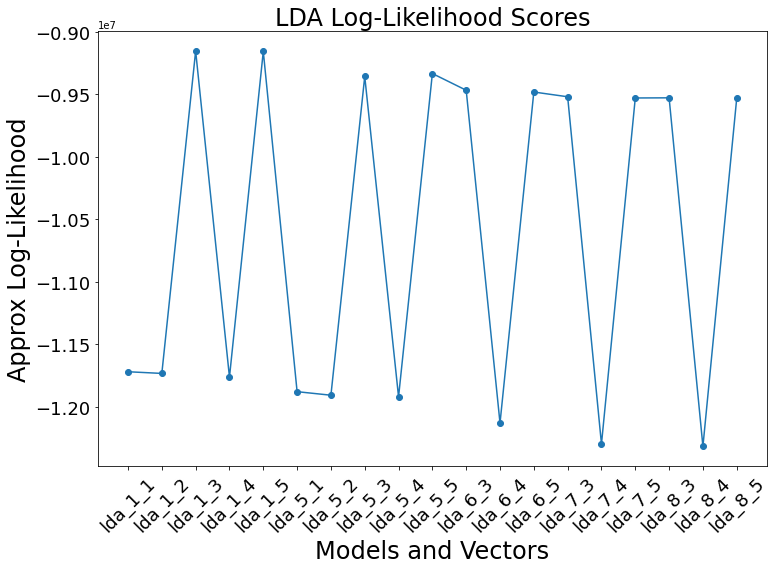

In [111]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(ldas, scores, linestyle='-', marker='o')
ax.set_xlabel('Models and Vectors', fontsize = 24)
ax.set_ylabel('Approx Log-Likelihood', fontsize=24)
ax.tick_params(axis='x', labelsize = 18, rotation=45)
ax.tick_params(axis='y', labelsize=18)
ax.set_title('LDA Log-Likelihood Scores', fontsize = 24);

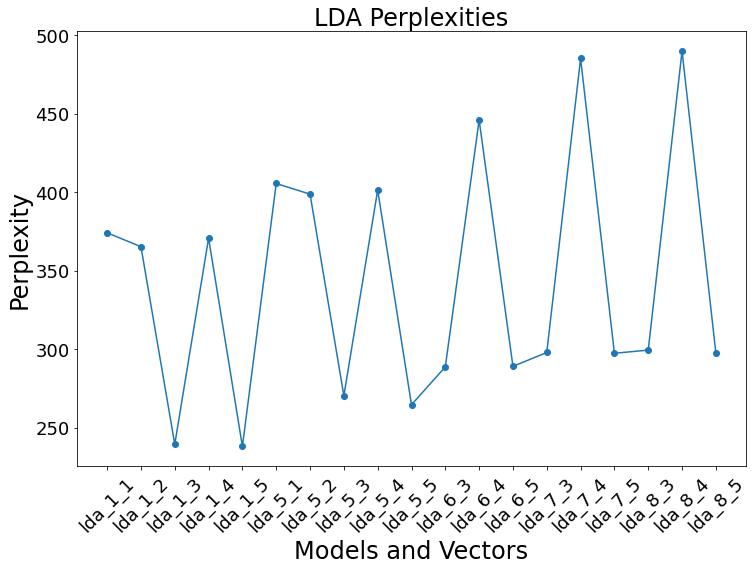

In [112]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(ldas, perplexity, linestyle='-', marker='o')
ax.set_xlabel('Models and Vectors', fontsize = 24)
ax.set_ylabel('Perplexity', fontsize=24)
ax.tick_params(axis='x', labelsize = 18, rotation=45)
ax.tick_params(axis='y', labelsize=18)
ax.set_title('LDA Perplexities', fontsize = 24);